# INF-SR: LabExercise Principal Component Analysis

Some (hidden) $\LaTeX$ definitions
$\newcommand{\v}[1]{{\mathbf #1}}$
$\newcommand{\ls}[1]{^{(#1)}}$
$\newcommand{\T}{^\intercal}$
$\DeclareMathOperator{\Normal}{Normal}$
$\newcommand{\expup}[1]{\mathrm{e}^{#1}}$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import imageio
import os
import wget
import sys

def sr_download(file):
    if not os.path.isfile(file):
        url = "https://staff.fnwi.uva.nl/r.vandenboomgaard/downloads/" + file
        print('[sr]',f'Downloading file {file} for statistical reasoning course')
        wget.download(url)
    else:
        print('[sr]',f'data {file} already downloaded')
        
sr_download('data3d.txt')
sr_download('trui.png')

import sys
print(sys.version)



[sr] data data3d.txt already downloaded
[sr] data trui.png already downloaded
3.13.0 (main, Nov  4 2024, 17:12:32) [Clang 14.0.0 (clang-1400.0.29.202)]


## A Simple 3D Data Set

Consider a simple 3D data set. Below you see two different views (from different angles) on the same data set. From the view in the right picture, you can see that the cloud of data points is almost flat in one direction.

![3D](https://staff.fnwi.uva.nl/r.vandenboomgaard/downloads/data3d.png)

The principal component analysis aims at finding a new origin and set of basis vectors that better 'fit' the data. The new origin will be the mean of your the vectors in your data set. The new basis vectors (in the space with a new origin) will be the eigenvectors of the covariance matrix.

We will use PCA for the dimensionality reduction of our data set. For the depicted data set, you can imagine that the coordinate for the basis vector perpendicular to the pancake-shaped point cloud doesn't add much information. Reducing the dimension from three to two is nothing else than setting that coordinate---in the shifted and rotated coordinate system---to zero.

The code below reads in the data and plots it.

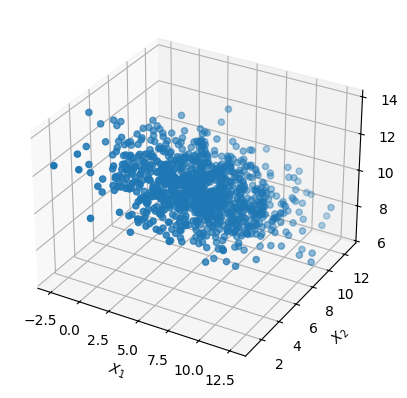

In [5]:
%matplotlib inline
X = np.loadtxt('data3d.txt',delimiter=',').T
f1 = plt.figure()
ax1 = f1.add_subplot(111,projection='3d')
ax1.scatter(X[:,0],X[:,1],X[:,2],'r');
ax1.set_xlabel(r'$X_1$');
ax1.set_ylabel(r'$X_2$');
ax1.set_zlabel(r'$X_3$');

In case you have ``qt`` installed you can change the statement ``%matplotlib inline`` to ``%matplotlib qt`` to view the dataset in a 3D renderer that allows you to view the dataset from all angles. Afterwards you should run the next cell to have all subsequent figures to be rendered inline again.

In [6]:
%matplotlib inline

The data matrix $X$ has all the vectors in the data sets as *rows* in it. The mean vector of the data set is easily calculated:

In [7]:
# calculate the mean as a (3,) shaped array
def calc_mean(X):
    return np.mean(X, axis=0)

From that we can calculate the 'zero mean' data set $X_{zm}$ by subtracting the mean vector from all rows in $X$.

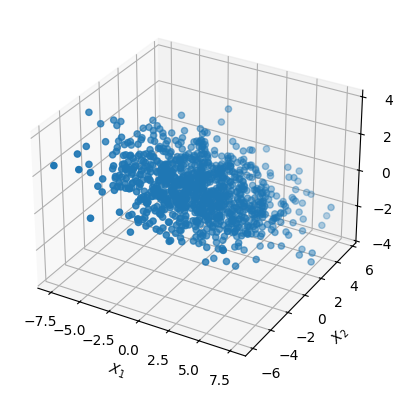

In [8]:
# Calculate zero mean data set
def zero_mean(X):
    return X - calc_mean(X)

Xzm = zero_mean(X)

%matplotlib inline
f1 = plt.figure()
ax1 = f1.add_subplot(111,projection='3d')
ax1.scatter(Xzm[:,0],Xzm[:,1],Xzm[:,2],'r');
ax1.set_xlabel(r'$X_1$');
ax1.set_ylabel(r'$X_2$');
ax1.set_zlabel(r'$X_3$');

Remember that the covariance matrix of the *zero mean* data set can be calculated as:
$$ C = \frac{1}{m} \sum_{i=1}^{m} \v x\ls i (\v x \ls i)\T $$
where the $\v x\ls i$ are the rows of the zero mean data matrix.

In [9]:
# Calculate the covariance matrix without an explicit (Python) loop 
# over the rows and without using a built-in function.
def covariance_matrix(Xzm):
    m = Xzm.shape[0]
    C = (Xzm.T @ Xzm) / m
    return C
C = covariance_matrix(Xzm)
print(C)

[[ 6.23624261  3.33900037 -2.55713467]
 [ 3.33900037  3.76256517 -0.65161164]
 [-2.55713467 -0.65161164  1.38097261]]


The eigenvectors of the covariance matrix form a new basis in the zero-mean feature space. In the original space the eigenvectors form a translated basis (what is called an affine basis). Draw the eigen (affine) basis vectors in the original basis, be sure to draw the vectors starting at the mean vector. Also give them a length that is about 3 times the standard deviation in that direction. Start with the scatter plot of the original data and draw the vectors in the scatter plot.

For PCA analysis we need to calculate the eigenvalue decomposition of the covariance matrix. In ``numpy.linalg`` we find two functions: ``eig`` and ``eigh``. Which one we need to use? (Read the documentation to make a choice).

In [10]:
def sorted_eigensystem(C):
    """Return tupe (d,U) where eigenvalues in d and eigenvectors in U (matrix)
    The eigenvalues in d should be in decreasing order"""
    values, vectors = np.linalg.eigh(C) # get the sorted eigenvalues and eigenvectors from a symmetric matrix
    return values[::-1], vectors[:,::-1] # reverse the order of the eigenvalues and eigenvectors

You can observe the eigenvectors with the following code:

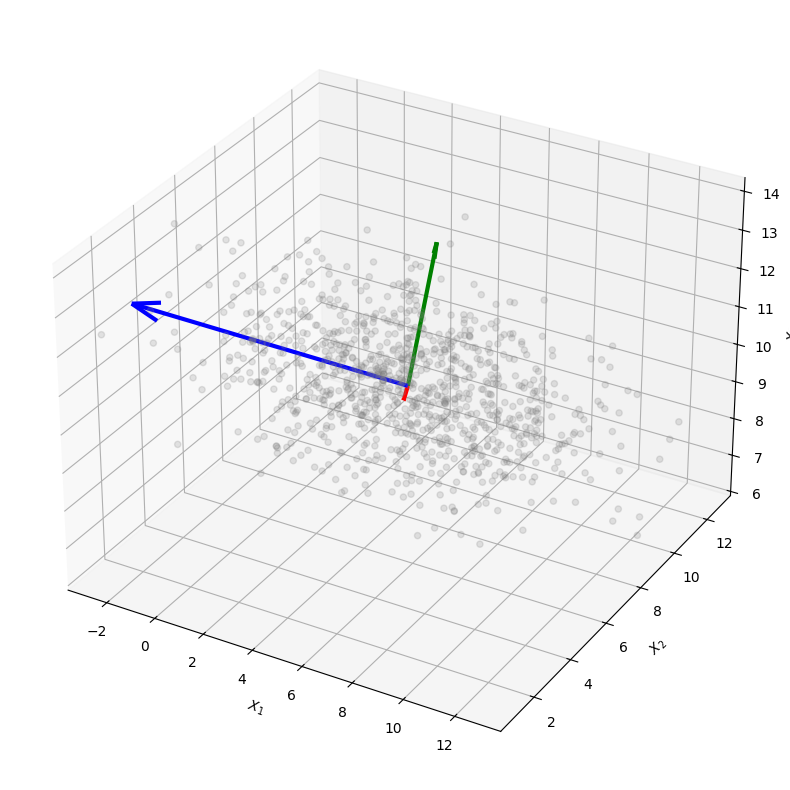

In [11]:
def plot_axes():
    f1 = plt.figure(figsize=(10,10))
    ax1 = f1.add_subplot(111,projection='3d')
    ax1.scatter(X[:,0],X[:,1],X[:,2],'r', color='gray', alpha=0.2);
    ax1.set_xlabel(r'$X_1$');
    ax1.set_ylabel(r'$X_2$');
    ax1.set_zlabel(r'$X_3$');

    d, U = sorted_eigensystem(C)
    meanvector = calc_mean(X)
    ax1.quiver3D(*meanvector, *U[:,0], length=3*np.sqrt(d[0]), lw=3, color='b', arrow_length_ratio=0.1)
    ax1.quiver3D(*meanvector, *U[:,1], length=3*np.sqrt(d[1]), lw=3, color='g', arrow_length_ratio=0.1)
    ax1.quiver3D(*meanvector, *U[:,2], length=3*np.sqrt(d[2]), lw=3, color='r', arrow_length_ratio=0.1);

# %matplotlib inline
plot_axes()

Here the ``%matplotlib qt`` 'trick' is usefull to see the axes from different angles. Be aware that the 3D drawing capability of matplotlib is rather a hack (e.g. no equal axes are possible so the eigenvectors do not appear to be perpendicular...). 

In [12]:
# uncomment the following three lines to see the plot in the qt viewer
# %matplotlib qt
# plot_axes()
# %matplotlib inline  

Every point in 3D space can be projected on the (affine) subspace spanned by the the first two eigenvectors of the covariance matrix.

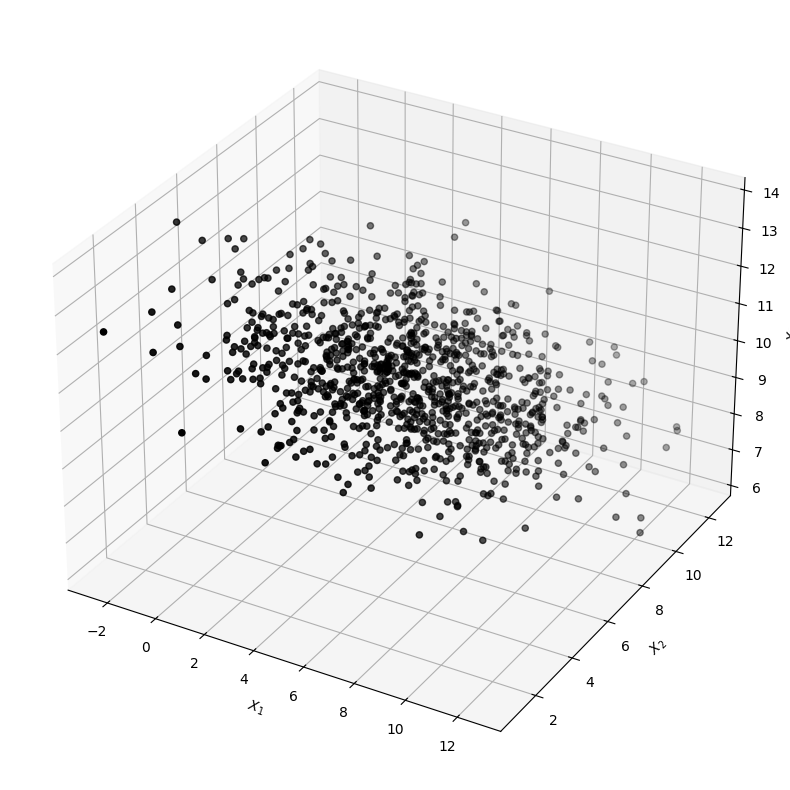

In [15]:
def plot_axes_2():
    mn = calc_mean(X)
    Xzm = X-mn
    d, U = sorted_eigensystem(covariance_matrix(Xzm))
    # project the points in X onto the 2D affine subspace
    # spanned by the first two eigenvectors of the covariance matrix
    # The result of the following block of code should be an array Xp
    # of shape (1000,3)
    
    U2 = U[:, :2]
    Xp = (U2 @ U2.T @ Xzm.T).T + mn


    f1 = plt.figure(figsize=(10,10))
    ax1 = plt.subplot(111,projection='3d')
    ax1.scatter(Xp[:,0], Xp[:,1], Xp[:,2],'r', color='black');    
    ax1.set_xlabel(r'$X_1$');
    ax1.set_ylabel(r'$X_2$');
    ax1.set_zlabel(r'$X_3$');
    return Xp
    
Xp = plot_axes_2()

To see the difference you really need to view the plot in qt and look at it from several angles

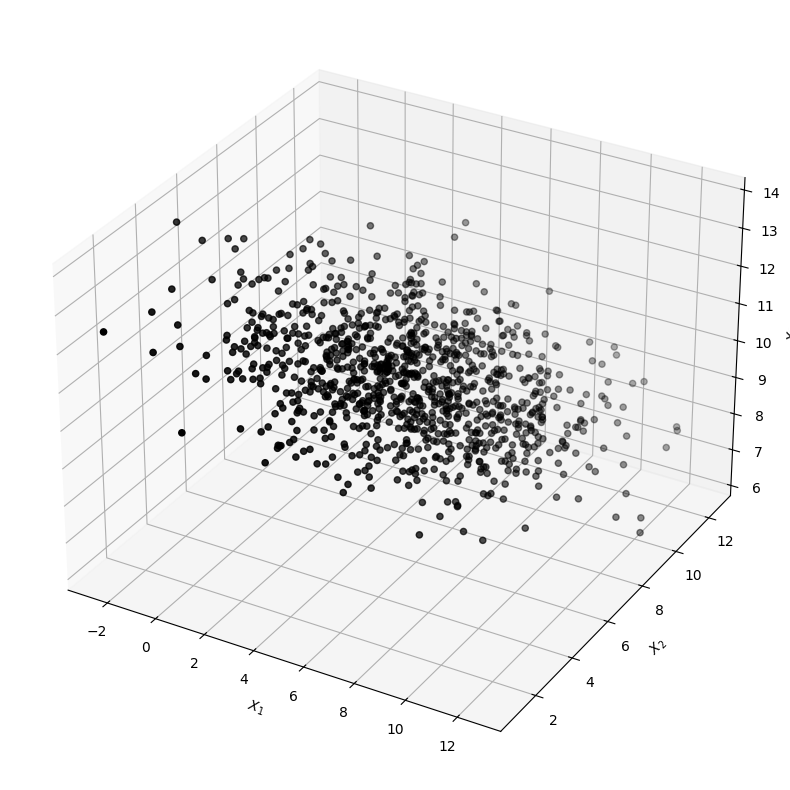

In [ ]:
# uncomment the following lines to see the qt viewer
# %matplotlib qt
# plot_axes_2();
# %matplotlib inline

## Eigen Images

<font color='red'>
Note for SR2023-2024: This section will not be graded. We highly recommend you still try to better understand the concept, especially since it is part of the exam material.
</font>

An image of $N\times N$ pixels can be interpreted as a data vector in $N^2$ dimensional space. Now let's consider a set of $m$ of those images as our data matrix $X$. In this exercise we don't consider large images as our data vectors but we look at small $N\times N$ details from images. Below the code to randomly select just 16 of those detail images from one larger image with $N=8$.

In [ ]:
plt.figure()
import imageio
f = imageio.v2.imread('trui.png')
plt.imshow(f); plt.gray()
plt.title('Image with 256x256 pixels')
plt.axis('off')
m = 16 # do not change this
N = 8
ys = np.random.randint(low=0, high=f.shape[0]-N, size=m)
xs = np.random.randint(low=0, high=f.shape[1]-N, size=m)
fs = np.zeros((m, N, N), dtype=f.dtype)
plt.figure()
for i, (y, x) in enumerate(zip(ys, xs)):
    fs[i,:,:] = f[y:(y+N), x:(x+N)]
    plt.subplot(4,4,i+1)
    plt.imshow(fs[i])
    plt.gray()
    plt.axis('off')
plt.suptitle('16 detail images of %d x %d pixels' % (N,N));


Your task is to collect many more details images (say $m=1000$) and do a PCA analysis on your data matrix. In this case you have to construct the mean and covariance matrix as you iterate through all your detail images.

In this situation you cannot first calculate the mean and then apply your zero_mean function to your data set. Instead you have to find a way to do the calculations incrementally for each vector in your data set (i.e. detail image). For the mean the way to do that should be obvious. For the covariance matrix you have to start with the definition of the covariance matrix for a sample:
$$ C = \frac{1}{m} \sum_{i=1}^{m} (\v x\ls i-\bar{\v x}) (\v x\ls i-\bar{\v x})\T$$
where $\bar{\v x}$ is the mean vector of the data set. You first have to expand the above expression ('haakjes wegwerken' in Dutch, i.e. get rid of the parentheses) to arrive at an equation that allows you to calculate the covariance matrix incrementally (as you work your way through all examples). This leads to the following expression for the covariance matrix:


\begin{align}
C = \left(\frac{1}{m} \sum_{i=1}^{m} \v x\ls i (\v x\ls i)\T\right) - \bar{\v x}\bar{\v x}\T
\end{align}

In the next cell you have to provide the missing code such that at the end the mean of the image details (``mean_fdetail``) and the covariance matrix (``cov_fdetail``) are calculated. The numpy function ``np.outer`` might be of some use.

In [ ]:
def calculate_mean_covariance(f, N, m, verbose=True):
    """
    This function calculates the mean vector (mean_fdetail) and covariance matrix 
    (cov_fdetail) of the set of m vectors that are randomly chosen from the image f 
    where each vector corresponds with a NxN detail from the image f. The function returns
    the tuple (mean_fdetail, cov_fdetail). If verbose=True all the top-left corners of
    the NxN image details are plotted on top of the rendering of image f
    """
    # make arrays of x,y indices in the image (top-left corners of the NxN detail images)
    ys = np.random.randint(low=0, high=f.shape[0]-N, size=m)
    xs = np.random.randint(low=0, high=f.shape[1]-N, size=m)
    if verbose:
        plt.figure()
        plt.imshow(f, cmap='gray')
        plt.scatter(ys, xs, marker='.')
        plt.axis('off')
    # initialization of mean_fdetail and cov_fdetail
    #. Your solution here ...
    for y, x in zip(ys, xs):
        # get the NxN image detail at position (x,y) from the image
        # and make it into a vector (with flatten method)
        fdetail = f[y:(y+N), x:(x+N)].flatten().astype(np.float64)
        # update of mean_fdetail and cov_fdetail with new detail vector
        #. Your solution here ...
    # finalizing after loop resulting in mean_fd and cov_fd
    #. Your solution here ...
    return mean_fdetail, cov_fdetail

f = imageio.v2.imread('trui.png')
np.random.seed(8634832)
mean_fdetail, cov_fdetail = calculate_mean_covariance(f, 8, 2000, verbose=True)

The image above shows the original image with dots reprensenting the $m$ top left corners of the detail images used to calculate the mean vector (image) and the covariance matrix.

In [ ]:
plt.figure()
imdisp = plt.imshow(mean_fdetail.reshape((8,8)), cmap='gray');
plt.colorbar(imdisp);

Observe that the mean image is an almost constant image. Don't be fooled by the ``imshow`` rendering of the image. The function ``imshow`` stretches the gray values from black to white over the range present in the image. So even small differences in gray value are made visible. Also note that the value in the mean image is almost equal to the mean of all gray values in the image: a perfect gray, somewhere in the middle of all possible gray values. This is often the case for arbitrary images (the 'gray world assumption' is even valid for a large set of natural color images).

For PCA analysis we need to calculate the eigen value decomposition of the covariance matrix. Use the sorted_eigensystem function to calculate the eigenvectors (after a reshape these are the eigenimages in this case)

Make a plot of the 'eigen image details' corresponding with the ten **largest** eigenvalues. Make sure to display the images with colormap 'gray' (`imshow(image, cmap='gray')`)

Your image should look something like:
![3D](https://staff.fnwi.uva.nl/r.vandenboomgaard/downloads/eigendetails.png =500x)


In [ ]:
d, U = sorted_eigensystem(cov_fdetail)
N = 8
#. Your solution here ...

Your image should look a bit like

<img src="http://staff.fnwi.uva.nl/r.vandenboomgaard/downloads/eigendetails.png" width=500> 


In the course on computer vision we will see these types of image details as the basic 'building blocks' for images.

## Image Compression using PCA

<font color='red'>
This section will not be graded. You don't have to program anything new. Your functions `calculate_mean_covariance` and `sorted_eigensystem` will be used.
</font>

What if we replaced each small $N\times N$ detail in an image with its PCA approximation based on the first $k$ components only? This is exactly what you have to do in the remainder of this notebook. Use the 'trui.png' image for this and for convenience make $N$ an integer divisor of 256 (8, 16, ..). In the cell(s) below you should plot side by side the original image $\v x$ and its approximated version $U_k \v y_k + \bar{\v x}$ where $\v y_k = U_k\T(\v x - \bar{\v x})$.

Experiment with different values of $N$ and $k$, it depends on the size of $N$ what minimal $k$ will give acceptable results (you'll be the judge.. Hint a quantitative approach where you make a plot of the mean squared difference of the original and approximated image will get you some extra points...).

The minimal result we want to see below is a figure where side by side the original image is shown and next to it the approximated image where you replace each $N\times N$ block with its approximation using $k$ eigenvectors (do not forget to add the mean gray value).



In [ ]:
%matplotlib inline
f = imageio.v2.imread('trui.png')
np.random.seed(8634832)
N = 8
mean_fdetail, cov_fdetail = calculate_mean_covariance(f, N, 2000, verbose=False)
d, U = sorted_eigensystem(cov_fdetail)


k = 8
Uk = U[:,:k]
g = np.zeros_like(f)
for y in range(0, f.shape[0], N):
    for x in range(0, f.shape[1], N):
        fd = f[y:(y+N), x:(x+N)].flatten().astype(np.float64)
        gd = Uk @ Uk.T @ (fd - mean_fdetail) + mean_fdetail
        g[y:(y+N), x:(x+N)] = gd.reshape((N,N)).astype(np.uint8)
        
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(f)
plt.gray()
plt.axis('off')
plt.subplot(222)
plt.imshow(g, vmin=f.min(), vmax=f.max())
plt.axis('off');
plt.subplot(223)
plt.plot(f[128,:])
plt.subplot(224)
plt.plot(g[128,:]);
plt.gray()